# Задача 2

In [147]:
%matplotlib inline
import numpy as np
import math as mt
import matplotlib
import matplotlib.pyplot as plt
from pylab import *
from scipy.stats import *
from mpl_toolkits.mplot3d import Axes3D

In [148]:
from sklearn.datasets import load_iris
data = load_iris()
data.target[[10, 25, 50]]
list(data.target_names)

means = []
sigmas = []

it = 0
for i in range(3):
    tmp = []
    while it < len(data['data']) and data['target'][it] == i:
        tmp.append(data['data'][it])
        it += 1
    means.append([mean(tmp[0]), mean(tmp[1]), mean(tmp[2]), mean(tmp[3])])
    sigmas.append(cov(tmp, rowvar=0))
means = np.array(means)
sigmas = np.array(sigmas)

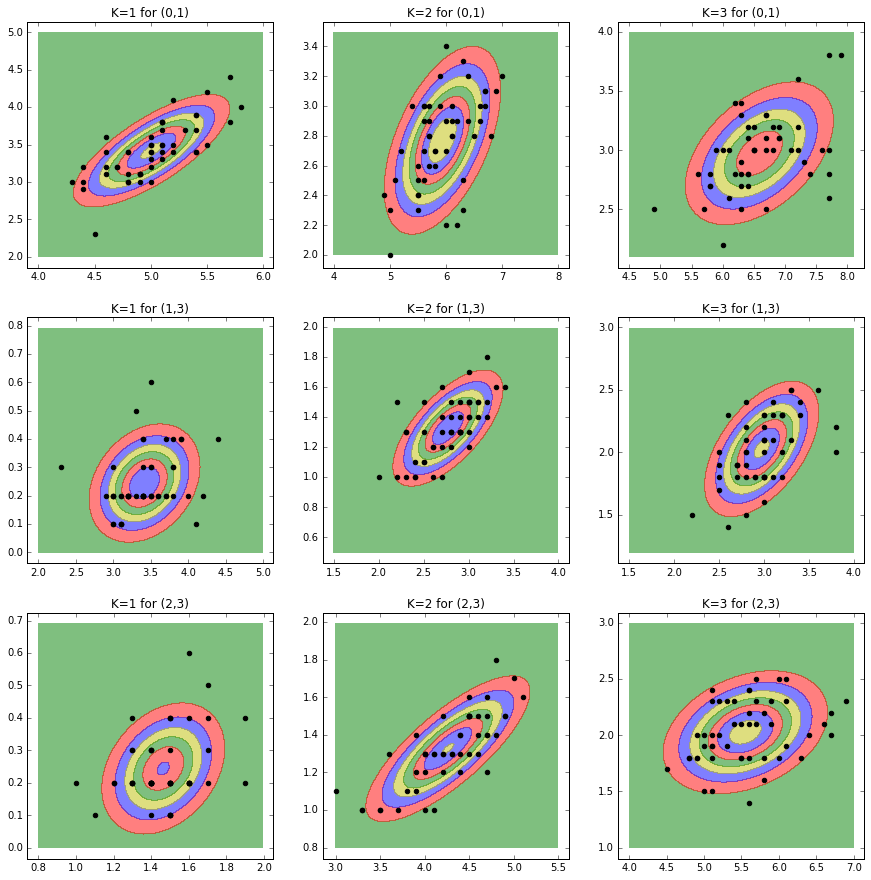

In [173]:
coords = [[0,1], [1,3], [2,3]]  # Пары координат
means_for_3 = np.zeros((3,3,2))  # Сюда запишу три вектора средних для
                                 # каждой пары координат
sigma_for_3 = np.zeros((3,3,2,2))  # Сюда запишу три матрицы ковариации
                                   # для каждой компоненты для
                                   # каждой пары координат
Xs = [[[],[],[]],[[],[],[]],[[],[],[]]]  # Сюда запишу массивы для каждой из координат
                                         # и для каждой компоненты
for i in range(3):
    ii, jj = coords[i]  # Номера первой и второй координат
    it = 0
    for j in range(3):
        while it < len(data['data']) and data['target'][it] == j:
            Xs[i][j].append(data['data'][it][[ii,jj]])
            it += 1
    Xs[i] = np.array(Xs[i])

    for j in range(3):
        # Здесь считаю матрицу ковариции и вектор средних
        sigma_for_3[i][j][0][0] = mean(Xs[i][j][:,0]*Xs[i][j][:,0])\
            -(mean(Xs[i][j][:,0])*mean(Xs[i][j][:,0]))
        sigma_for_3[i][j][1][1] = mean(Xs[i][j][:,1]*Xs[i][j][:,1])\
            -(mean(Xs[i][j][:,1])*mean(Xs[i][j][:,1]))
        sigma_for_3[i][j][0][1] = mean(Xs[i][j][:,0]*Xs[i][j][:,1])\
            -(mean(Xs[i][j][:,0])*mean(Xs[i][j][:,1]))
        sigma_for_3[i][j][1][0] = sigma_for_3[i][j][0][1]
        means_for_3[i][j][0] = mean(Xs[i][j][:,0])
        means_for_3[i][j][1] = mean(Xs[i][j][:,1])
    
# Рисую сетку графиков
plt.close('all')
ax = []
f, ax = plt.subplots(3, 3)
f.set_figheight(15)
f.set_figwidth(15)

# Здесь записаны пределы посроения сетки для расчета плостности
limits = [[[4,6,2,5],[4,8,2,3.5],[4.5,8.1,2.1,4]],
          [[2,5,0,0.8],[1.5,4,0.5,2],[1.5,4,1.2,3]],
          [[0.8,2,0,0.7],[3,5.5,0.8,2],[4,7,1,3]]]

# Рисую
for i in range(3):
    for j in range(3):
        x, y = np.mgrid[limits[i][j][0]:limits[i][j][1]:.01, \
                        limits[i][j][2]:limits[i][j][3]:.01]
        pos = np.empty(x.shape + (2,))
        pos[:, :, 0] = x; pos[:, :, 1] = y
        rv = multivariate_normal(means_for_3[i][j], sigma_for_3[i][j])

        ax[i][j].contourf(x, y, rv.pdf(pos), alpha=0.5, colors=('g','r','b','y'))
        ax[i][j].scatter(Xs[i][j][:,0],Xs[i][j][:,1], color='black')
        ax[i][j].set_title('K={} for ({},{})'.format(j+1,coords[i][0],\
                                                     coords[i][1]))
show()